In [31]:
import sys
import os
import pandas as pd
import numpy as np


sys.path.append(os.path.abspath("../../ml/"))
from apply_loocv_and_save import load_and_preprocess
from dev_utils import read_yaml_for_host
import warnings


config_data = read_yaml_for_host("sst_config.yml")

nonbids_data_path = config_data['nonbids_data_path']
ml_data_folderpath = nonbids_data_path + "fMRI/ml"


In [4]:
import multiprocessing
import math
import nibabel as nib
import nilearn as nl
from nilearn.decoding import DecoderRegressor,Decoder
from sklearn.model_selection import KFold,GroupKFold,LeaveOneOut
cpus_available = multiprocessing.cpu_count()

cpus_to_use = min(cpus_available-1,math.floor(0.9*cpus_available))
print(cpus_to_use)

9


In [5]:
# get the PFC mask
mask_nifti = nib.load(ml_data_folderpath + '/prefrontal_cortex.nii.gz')

In [7]:
brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_betaseries_15subs_correct_cond.pkl'
train_test_markers_filepath = ml_data_folderpath + "/train_test_markers_20220818T144138.csv"

In [12]:

def trialtype_resp_trans_func(X):
    return(X.trial_type)


all_subjects = load_and_preprocess(
    brain_data_filepath,
    train_test_markers_filepath,
    subjs_to_use = None,
    response_transform_func=trialtype_resp_trans_func,
    clean=None)

warnings.warn("the data hasn't been cleaned at any point. the fMRIPrep cleaning pipeline has been applied; nothing else has been.")


checked for intersection and no intersection between the brain data and the subjects was found.
there were 15 subjects overlapping between the subjects marked for train data and the training dump file itself.


/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/fMRI/ml/apply_loocv_and_save.py:217: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Brain_Data_allsubs.Y[Brain_Data_allsubs.Y=='NULL']=None


test_train_set: 62918
brain_data_filepath: 169
pkl_file: 168
train_test_markers_filepath: 158
response_transform_func: 144
sys: 72
Brain_Data_allsubs: 48
clean: 16
subjs_to_use: 16
1549
1549
cleaning memory


/var/folders/cj/4mb6t1f906j397tj71pxfxz00000gn/T/ipykernel_1235/3505500163.py:12: UserWarning: the data hasn't been cleaned at any point. the fMRIPrep cleaning pipeline has been applied; nothing else has been.
  warnings.warn("the data hasn't been cleaned at any point. the fMRIPrep cleaning pipeline has been applied; nothing else has been.")


In [49]:

ndarray_flat = mask_resampled.get_fdata().flatten()
#get a histogram of the values in the mask
hist = np.histogram(ndarray_flat,bins=100)

In [35]:
mask_resampled = nl.image.resample_to_img(mask_nifti, all_subjects['X'].slicer[:,:,:,0])
#binarize the mask again
mask_resampled_bin = nl.image.math_img("img>0.5",img=mask_resampled)
masked_img = nl.masking.apply_mask(all_subjects['X'], mask_resampled_bin)

/Users/benjaminsmith/opt/anaconda3/envs/neuralsignature/lib/python3.10/site-packages/nilearn/image/resampling.py:274: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn("Resampling binary images with continuous or "


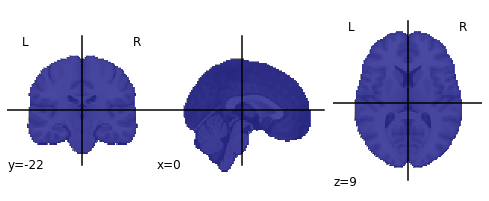

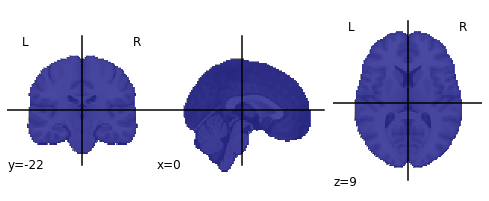

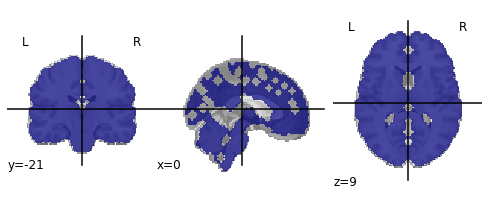

In [46]:
# get a mask from the subject's first image
subj_mask = nl.masking.compute_brain_mask(all_subjects['X'].slicer[:,:,:,1],threshold=0.01)
nl.plotting.plot_roi(subj_mask)
subj_mask = nl.masking.compute_brain_mask(all_subjects['X'].slicer[:,:,:,1],threshold=0.1)
nl.plotting.plot_roi(subj_mask)
subj_mask = nl.masking.compute_brain_mask(all_subjects['X'].slicer[:,:,:,1],threshold=0.5)
nl.plotting.plot_roi(subj_mask)

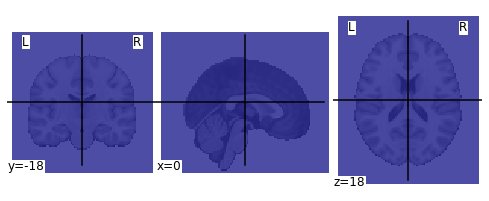

In [48]:
subj_mask = nl.masking.compute_brain_mask(all_subjects['X'].slicer[:,:,:,1],threshold=-0.1)
nl.plotting.plot_roi(subj_mask)
